# Quantitative analysis of streak artefacts
_Srayan Gangopadhyay_  
_05 Mar 2023_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Diameter of sufficiently sampled area
- For a selection of 3 brightness settings, judge by eye the diameter of the "streak-free" area, using the ImageJ circular ROI selection tool
- Compare findings against the theoretical relationships (from definitions of resolution, and Nyquist sampling):
    - Pixel limited: $N_\theta = \pi \times N_\textup{pixels} = 1040 \times \pi = 3267$
    - Diffraction limited: $N_\theta = \frac{\pi \times D \times \textup{NA}}{0.61 \times n \times\lambda} = 1387$ for $\lambda=562$ nm, NA=0.03 (at f/d=f/17), n=1.33 (water) and D=6.71 mm (full field of view)

In [10]:
proj = [250, 500, 1000, 2000]
b_78 = [260, 390, 740, 925]
b_135 = [236, 425, 774, 975]
b_33 = [240, 464, 606, 795]

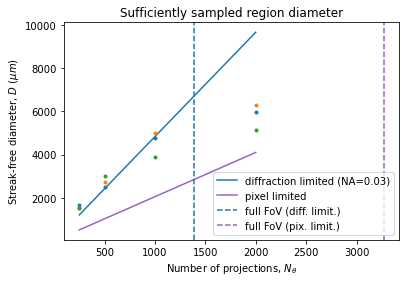

In [80]:
def diam(proj, ri=1.33, wvln=562e-9, na=0.03):
    return (proj * 0.61 * ri * wvln) / (np.pi * na)

x = np.arange(250, 2000)
plt.plot(x, diam(x)/1e-6, color='tab:blue', label='diffraction limited (NA=0.03)')
plt.plot(x, (x/np.pi)*6.45, color='tab:purple', label='pixel limited')

for lst in [b_78, b_135, b_33]:
    plt.plot(proj, np.array(lst)*6.45, '.')

plt.axvline(x=1387, linestyle='--', color='tab:blue', label='full FoV (diff. limit.)')
plt.axvline(x=3267, linestyle='--', color='tab:purple', label='full FoV (pix. limit.)')

plt.xlabel(r'Number of projections, $N_{\theta}$')
plt.ylabel(r'Streak-free diameter, $D$ ($\mu m$)')
plt.legend()
plt.title('Sufficiently sampled region diameter')
plt.show()

## 2. Intensity in the streaks
- For a selection of positions in the image, which should nominally be dark (away from any beads), plot line profiles in ImageJ to obtain the average intensity in the streaks

In [22]:
ls ./../../data_store/'2023-03-05 streak line profiles'

 row45_Stack.tif           'X917 Y358 A90 L320.csv'
'X1005 Y586 A45 L584.csv'  'X966 Y317 A0 L365.csv'


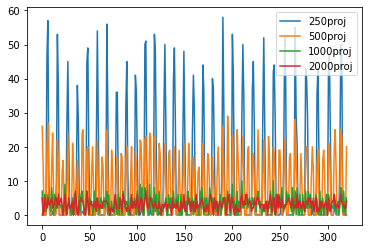

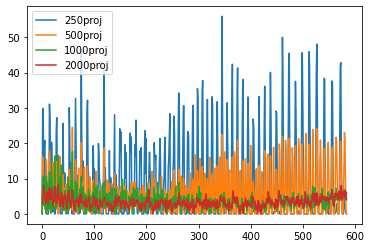

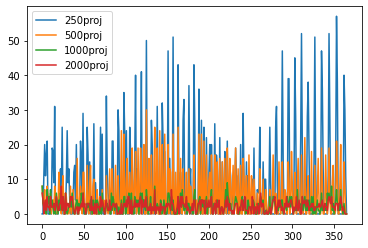

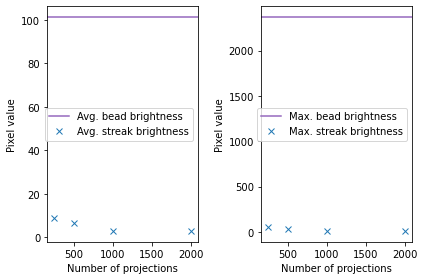

In [28]:
mns_250 = []
mns_500 = []
mns_1000 = []
mns_2000 = []
mxs_250 = []
mxs_500 = []
mxs_1000 = []
mxs_2000 = []

for file in ['X917 Y358 A90 L320.csv', 'X1005 Y586 A45 L584.csv', 'X966 Y317 A0 L365.csv']:
    df = pd.read_csv(f'./../../data_store/2023-03-05 streak line profiles/{file}')
    df.plot()
    (mn_250, mn_500, mn_1000, mn_2000) = df.mean()
    mns_250.append(mn_250)
    mns_500.append(mn_500)
    mns_1000.append(mn_1000)
    mns_2000.append(mn_2000)
    (mx_250, mx_500, mx_1000, mx_2000) = df.max()
    mxs_250.append(mx_250)
    mxs_500.append(mx_500)
    mxs_1000.append(mx_1000)
    mxs_2000.append(mx_2000)

bead_means = [132.663,121.053,98.485,140.391,76.361,126.64,196.26,125.533,68.454,42.272,87.208,106.557,76.069,54.694,61.123,59.227,44.949,140.663,96.288,195.976,77.279]
bead_maxes = [2353,2353,2353,2353,2353,2362,2362,2362,2362,2362,2362,2376,2376,2376,2376,2376,2389,2389,2389,2389,2389]

fig, axs = plt.subplots(1, 2)
axs[0].axhline(np.mean(bead_means), color='tab:purple', label='Avg. bead brightness')
axs[0].plot(proj, [np.mean(lst) for lst in [mns_250, mns_500, mns_1000, mns_2000]], 'x', label='Avg. streak brightness')
axs[0].set_xlabel('Number of projections')
axs[0].set_ylabel('Pixel value')
axs[0].legend()

axs[1].axhline(np.mean(bead_maxes), color='tab:purple', label='Max. bead brightness')
axs[1].plot(proj, [np.mean(lst) for lst in [mxs_250, mxs_500, mxs_1000, mxs_2000]], 'x', label='Max. streak brightness')
axs[1].set_xlabel('Number of projections')
axs[1].set_ylabel('Pixel value')
axs[1].legend()
plt.tight_layout()
plt.show()